#### CIS 6397 - Text Mining - Mini Project 1
#####  Project Team:
######     Venkata Sai Bharath Thoranala: 2245697
######     Pradeep Reddy Mallepally: 2200020
######     Vamsi Krishna Reddy Batchu: 2213933
        

In [1]:
# Downloading the required libraries

import os  # Provides functions for interacting with the operating system
import nltk  # Natural Language Toolkit for text processing
from collections import Counter # Used to count word frequencies
nltk.download('punkt') # Downloading the tokenizer model
from nltk.util import ngrams
import re
nltk.download('stopwords')
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from num2words import num2words
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\14092\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14092\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exercise 1

In [2]:
# Paths to Corpus1 and Corpus2 directories
corpus1_dir = r'C:\Users\14092\OneDrive - University Of Houston\Desktop\Fall 2023\Text Mining\Assignments\Mini Project 1\Corpus1\Corpus1'
corpus2_dir = r'C:\Users\14092\OneDrive - University Of Houston\Desktop\Fall 2023\Text Mining\Assignments\Mini Project 1\Corpus2\Corpus2'

In [3]:
# Function to process a corpus directory
def process_corpus_for_list(corpus_dir):
    words_in_corpus = []
    # Loop through all files in the directory
    for filename in os.listdir(corpus_dir):
        with open(os.path.join(corpus_dir, filename), 'r', encoding='utf-8',errors='ignore') as file: # Open each file in the corpus for reading
            file_contents = file.read()
            content_without_numbers = re.sub(r'\d+', '', file_contents)
            file_contents1 = re.sub(r'[^a-zA-Z\s]', '', content_without_numbers).lower()
            file_contents2 = file_contents1.lower() #remove numbers
            tokens = word_tokenize(file_contents1)  # Tokenize/ break into list of words
            #Code to remove special characters
            filtered_tokens = ["".join(RegexpTokenizer(r'\w+').tokenize(token)) for token in tokens if len(RegexpTokenizer(r'\w+').tokenize(token)) > 0]
            words_in_corpus.extend(filtered_tokens)  # Extend the final_words list with the current file's words
    return words_in_corpus

In [4]:
# Function to process a corpus directory and to find bi-grams
def process_corpus_for_bigrams(corpus_dir):
    words_with_bigrams = []
    # Loop through all files in the directory
    for filename in os.listdir(corpus_dir):
        with open(os.path.join(corpus_dir, filename), 'r', encoding='utf-8',errors='ignore') as file:
            file_contents = file.read()
            content_without_numbers = re.sub(r'\d+', '', file_contents)
            file_contents1 = re.sub(r'[^a-zA-Z\s]', '', content_without_numbers).lower()
            file_contents2 = file_contents1.lower() #remove numbers
            file_contents1 = content_without_numbers.lower() #remove numbers
            tokens = word_tokenize(file_contents1)  # Tokenize/ break into list of words
            #Code to remove special characters
            filtered_tokens = ["".join(RegexpTokenizer(r'\w+').tokenize(token)) for token in tokens if len(RegexpTokenizer(r'\w+').tokenize(token)) > 0]
            bigrams = list(ngrams(filtered_tokens, 2))
            words_with_bigrams.extend(bigrams)  # Extend the final_words list with the current file's words
    return words_with_bigrams

In [5]:
# Processing each corpus and get the 30 most common words
corpus1_word_list = process_corpus_for_list(corpus1_dir)
corpus2_word_list = process_corpus_for_list(corpus2_dir)

In [6]:
print('The 30 most common words in corpus 1 are')
Counter(corpus1_word_list).most_common(30) #Counter() gives count for each word/ most common gives 30 highest used words

The 30 most common words in corpus 1 are


[('the', 99962),
 ('of', 64769),
 ('and', 38783),
 ('to', 35766),
 ('in', 32345),
 ('a', 27389),
 ('that', 16868),
 ('is', 16680),
 ('it', 13386),
 ('for', 12498),
 ('as', 11383),
 ('be', 10406),
 ('was', 9541),
 ('by', 9087),
 ('this', 8817),
 ('on', 8694),
 ('or', 8130),
 ('with', 8096),
 ('not', 7788),
 ('which', 7669),
 ('are', 7372),
 ('at', 7270),
 ('he', 6828),
 ('have', 6250),
 ('i', 5632),
 ('from', 5603),
 ('money', 5577),
 ('his', 5435),
 ('but', 5288),
 ('all', 5245)]

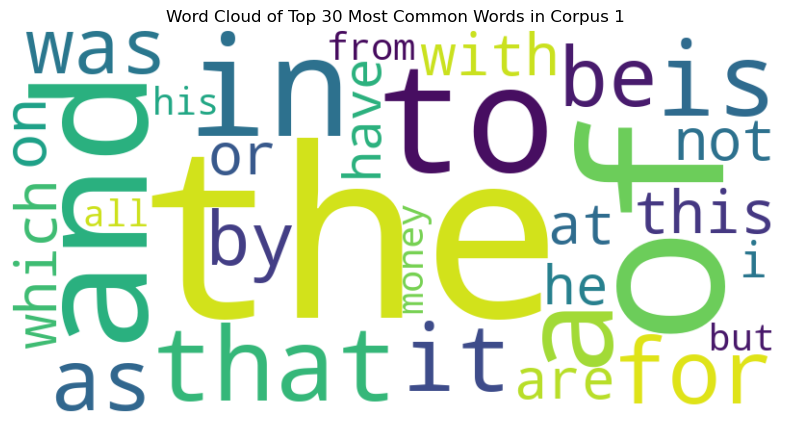

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you already have corpus1_word_list defined

# Get the 30 most common words and their frequencies
common_words = Counter(corpus1_word_list).most_common(30)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 30 Most Common Words in Corpus 1')
plt.show()


In [8]:
print('The 50 most common words in corpus 2 are')
Counter(corpus1_word_list).most_common(50) #Counter() gives count for each word/ most common gives 30 highest used words

The 50 most common words in corpus 2 are


[('the', 99962),
 ('of', 64769),
 ('and', 38783),
 ('to', 35766),
 ('in', 32345),
 ('a', 27389),
 ('that', 16868),
 ('is', 16680),
 ('it', 13386),
 ('for', 12498),
 ('as', 11383),
 ('be', 10406),
 ('was', 9541),
 ('by', 9087),
 ('this', 8817),
 ('on', 8694),
 ('or', 8130),
 ('with', 8096),
 ('not', 7788),
 ('which', 7669),
 ('are', 7372),
 ('at', 7270),
 ('he', 6828),
 ('have', 6250),
 ('i', 5632),
 ('from', 5603),
 ('money', 5577),
 ('his', 5435),
 ('but', 5288),
 ('all', 5245),
 ('they', 4786),
 ('you', 4478),
 ('their', 4253),
 ('had', 4187),
 ('would', 4171),
 ('has', 4158),
 ('an', 4135),
 ('we', 4122),
 ('will', 3888),
 ('if', 3768),
 ('one', 3758),
 ('bank', 3745),
 ('its', 3725),
 ('any', 3716),
 ('were', 3693),
 ('been', 3645),
 ('other', 3478),
 ('no', 3305),
 ('there', 3296),
 ('so', 3180)]

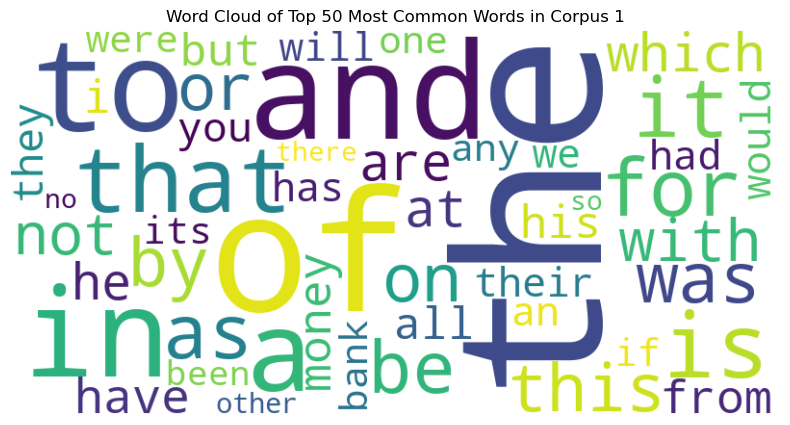

In [9]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus1_word_list).most_common(50)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 50 Most Common Words in Corpus 1')
plt.show()


In [10]:
print('The 30 most common words in corpus 2 are')
Counter(corpus2_word_list).most_common(30) #Counter() gives count for each word/ most common gives 30 highest used words

The 30 most common words in corpus 2 are


[('the', 125950),
 ('and', 84212),
 ('to', 65932),
 ('of', 64635),
 ('a', 47448),
 ('i', 41336),
 ('in', 37032),
 ('he', 34886),
 ('that', 30150),
 ('was', 29583),
 ('it', 27390),
 ('his', 24563),
 ('you', 24198),
 ('her', 22744),
 ('with', 21920),
 ('not', 19764),
 ('had', 19365),
 ('she', 19215),
 ('for', 18743),
 ('as', 17400),
 ('but', 16470),
 ('at', 16082),
 ('on', 15118),
 ('him', 15092),
 ('is', 14648),
 ('be', 13404),
 ('me', 12585),
 ('my', 12366),
 ('all', 12314),
 ('said', 11926)]

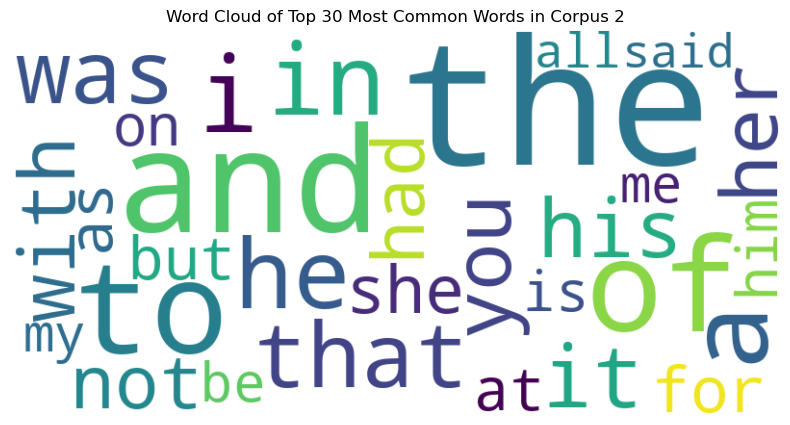

In [11]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus2_word_list).most_common(30)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 30 Most Common Words in Corpus 2')
plt.show()


In [12]:
print('The 50 most common words in corpus 2 are')
Counter(corpus2_word_list).most_common(50) #Counter() gives count for each word/ most common gives 30 highest used words

The 50 most common words in corpus 2 are


[('the', 125950),
 ('and', 84212),
 ('to', 65932),
 ('of', 64635),
 ('a', 47448),
 ('i', 41336),
 ('in', 37032),
 ('he', 34886),
 ('that', 30150),
 ('was', 29583),
 ('it', 27390),
 ('his', 24563),
 ('you', 24198),
 ('her', 22744),
 ('with', 21920),
 ('not', 19764),
 ('had', 19365),
 ('she', 19215),
 ('for', 18743),
 ('as', 17400),
 ('but', 16470),
 ('at', 16082),
 ('on', 15118),
 ('him', 15092),
 ('is', 14648),
 ('be', 13404),
 ('me', 12585),
 ('my', 12366),
 ('all', 12314),
 ('said', 11926),
 ('have', 11303),
 ('this', 11084),
 ('so', 9912),
 ('by', 9232),
 ('from', 9107),
 ('they', 8901),
 ('what', 8341),
 ('or', 7995),
 ('which', 7964),
 ('no', 7710),
 ('were', 7539),
 ('there', 7508),
 ('would', 7463),
 ('we', 7383),
 ('one', 7196),
 ('if', 7114),
 ('when', 6938),
 ('up', 6740),
 ('out', 6734),
 ('them', 6405)]

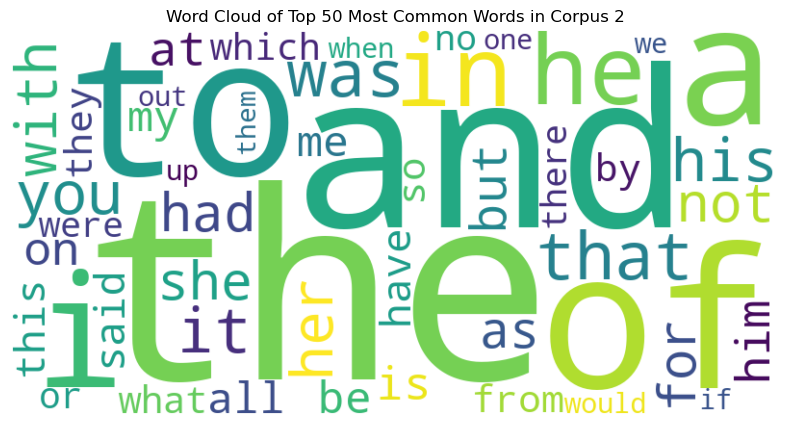

In [13]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus2_word_list).most_common(50)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 50 Most Common Words in Corpus 2')
plt.show()


## Exercise 2

In [14]:
#Convert text file to bigrams
corpus1_bigrams = process_corpus_for_bigrams(corpus1_dir)
corpus2_bigrams = process_corpus_for_bigrams(corpus2_dir)

In [15]:
print('The 30 most common bigrams in corpus 1 are')
Counter(corpus1_bigrams).most_common(30)

The 30 most common bigrams in corpus 1 are


[(('of', 'the'), 17254),
 (('in', 'the'), 8822),
 (('to', 'the'), 5564),
 (('and', 'the'), 3675),
 (('on', 'the'), 3459),
 (('for', 'the'), 3022),
 (('it', 'is'), 2979),
 (('that', 'the'), 2866),
 (('est', 'est'), 2740),
 (('to', 'be'), 2633),
 (('by', 'the'), 2620),
 (('with', 'the'), 2282),
 (('of', 'a'), 2124),
 (('at', 'the'), 1931),
 (('new', 'york'), 1753),
 (('from', 'the'), 1649),
 (('of', 'this'), 1594),
 (('united', 'states'), 1575),
 (('in', 'a'), 1499),
 (('project', 'gutenberg'), 1445),
 (('the', 'bank'), 1408),
 (('as', 'a'), 1395),
 (('of', 'money'), 1393),
 (('is', 'a'), 1390),
 (('the', 'same'), 1386),
 (('it', 'was'), 1311),
 (('as', 'the'), 1278),
 (('the', 'united'), 1273),
 (('is', 'the'), 1218),
 (('all', 'the'), 1207)]

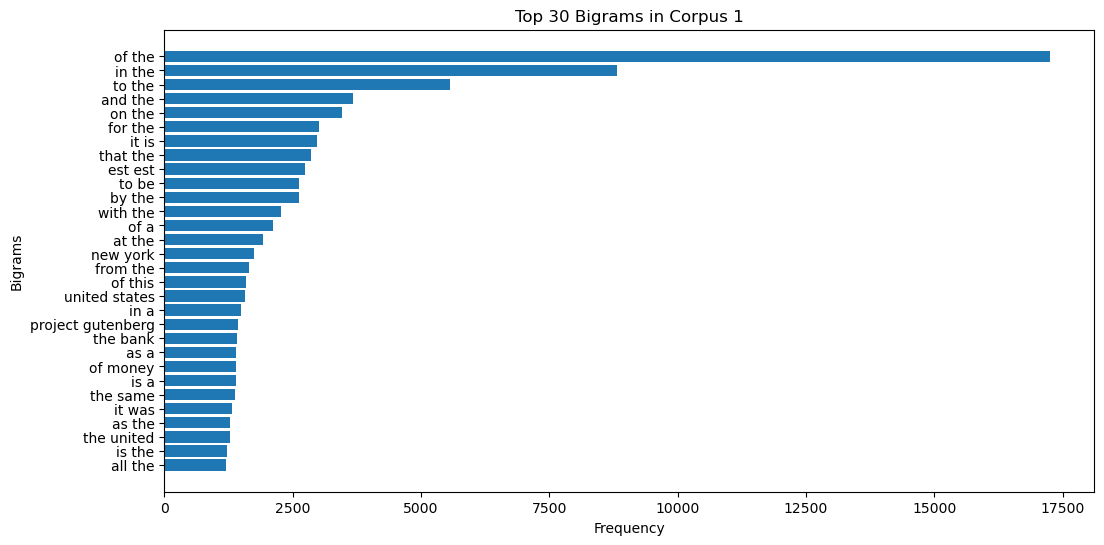

In [16]:
# Extract bigram and frequency for plotting
bigrams, frequencies = zip(*Counter(corpus1_bigrams).most_common(30))
# Create a bar chart to visualize the bigram frequencies
plt.figure(figsize=(12, 6))
plt.barh(range(len(bigrams)), frequencies, tick_label=[" ".join(bigram) for bigram in bigrams])
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 30 Bigrams in Corpus 1")
plt.gca().invert_yaxis()
plt.show()

In [17]:
print('The 40 most common bigrams in corpus 1 are')
Counter(corpus1_bigrams).most_common(40)

The 40 most common bigrams in corpus 1 are


[(('of', 'the'), 17254),
 (('in', 'the'), 8822),
 (('to', 'the'), 5564),
 (('and', 'the'), 3675),
 (('on', 'the'), 3459),
 (('for', 'the'), 3022),
 (('it', 'is'), 2979),
 (('that', 'the'), 2866),
 (('est', 'est'), 2740),
 (('to', 'be'), 2633),
 (('by', 'the'), 2620),
 (('with', 'the'), 2282),
 (('of', 'a'), 2124),
 (('at', 'the'), 1931),
 (('new', 'york'), 1753),
 (('from', 'the'), 1649),
 (('of', 'this'), 1594),
 (('united', 'states'), 1575),
 (('in', 'a'), 1499),
 (('project', 'gutenberg'), 1445),
 (('the', 'bank'), 1408),
 (('as', 'a'), 1395),
 (('of', 'money'), 1393),
 (('is', 'a'), 1390),
 (('the', 'same'), 1386),
 (('it', 'was'), 1311),
 (('as', 'the'), 1278),
 (('the', 'united'), 1273),
 (('is', 'the'), 1218),
 (('all', 'the'), 1207),
 (('per', 'cent'), 1154),
 (('have', 'been'), 1148),
 (('value', 'of'), 1137),
 (('would', 'be'), 1076),
 (('there', 'is'), 1066),
 (('the', 'stock'), 1062),
 (('in', 'this'), 1046),
 (('has', 'been'), 1045),
 (('may', 'be'), 1025),
 (('will', 'be'

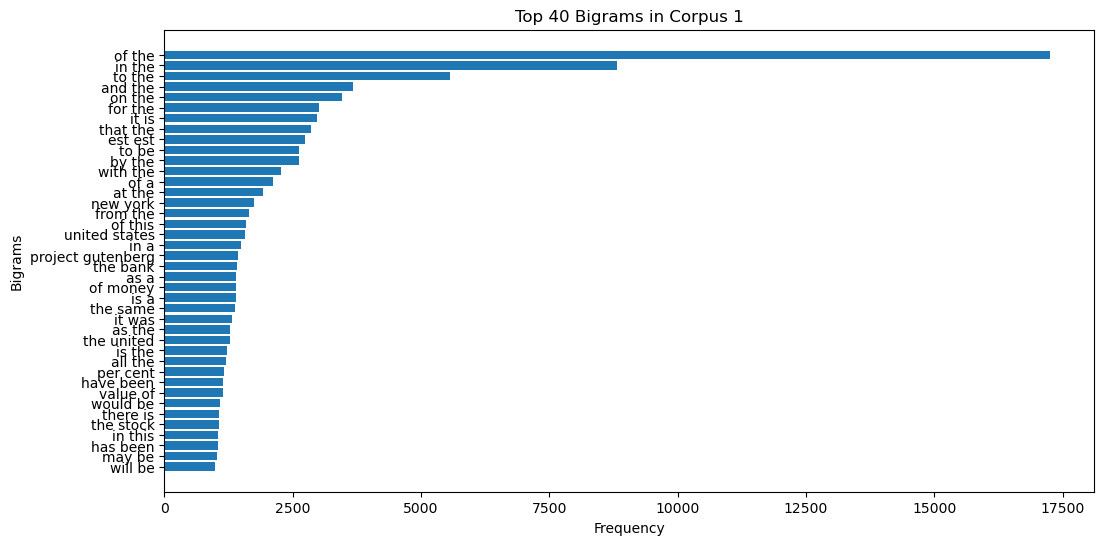

In [18]:
# Extract bigram and frequency for plotting
bigrams, frequencies = zip(*Counter(corpus1_bigrams).most_common(40))
# Create a bar chart to visualize the bigram frequencies
plt.figure(figsize=(12, 6))
plt.barh(range(len(bigrams)), frequencies, tick_label=[" ".join(bigram) for bigram in bigrams])
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 40 Bigrams in Corpus 1")
plt.gca().invert_yaxis()
plt.show()

In [19]:
print('The 30 most common bigrams in corpus 2 are')
Counter(corpus2_bigrams).most_common(30)

The 30 most common bigrams in corpus 2 are


[(('of', 'the'), 14365),
 (('in', 'the'), 9997),
 (('to', 'the'), 6778),
 (('and', 'the'), 4959),
 (('on', 'the'), 4722),
 (('it', 'was'), 4260),
 (('to', 'be'), 4086),
 (('at', 'the'), 3915),
 (('he', 'had'), 3817),
 (('he', 'was'), 3619),
 (('with', 'the'), 3090),
 (('in', 'a'), 2984),
 (('and', 'i'), 2956),
 (('of', 'his'), 2856),
 (('of', 'a'), 2765),
 (('that', 'he'), 2760),
 (('for', 'the'), 2732),
 (('it', 'is'), 2689),
 (('with', 'a'), 2624),
 (('i', 'am'), 2591),
 (('from', 'the'), 2569),
 (('had', 'been'), 2458),
 (('did', 'not'), 2348),
 (('i', 'have'), 2312),
 (('by', 'the'), 2241),
 (('all', 'the'), 2182),
 (('don', 't'), 2164),
 (('was', 'a'), 2160),
 (('she', 'was'), 2110),
 (('and', 'he'), 2107)]

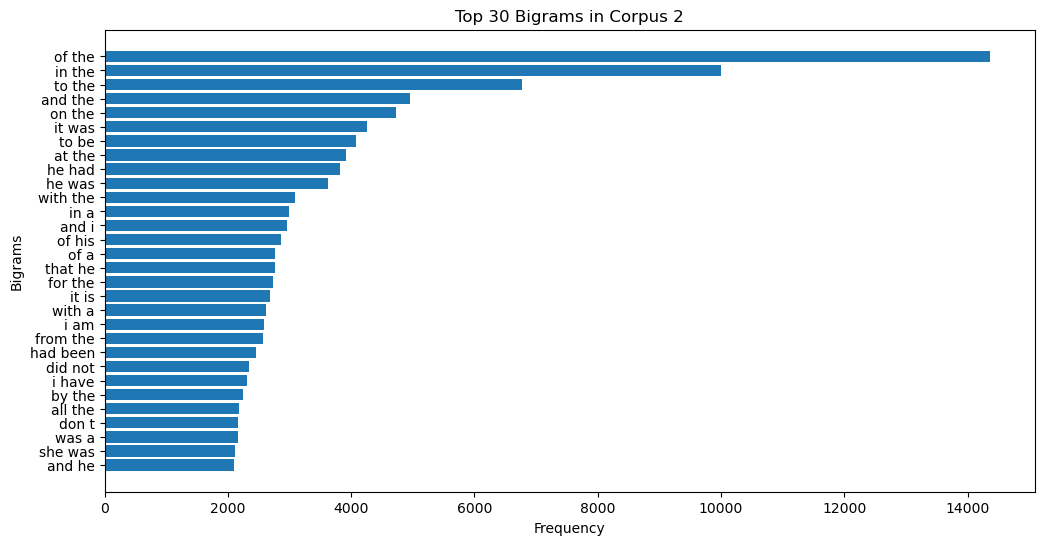

In [20]:
# Extract bigram and frequency for plotting
bigrams, frequencies = zip(*Counter(corpus2_bigrams).most_common(30))
# Create a bar chart to visualize the bigram frequencies
plt.figure(figsize=(12, 6))
plt.barh(range(len(bigrams)), frequencies, tick_label=[" ".join(bigram) for bigram in bigrams])
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 30 Bigrams in Corpus 2")
plt.gca().invert_yaxis()
plt.show()

In [21]:
print('The 40 most common bigrams in corpus 2 are')
Counter(corpus2_bigrams).most_common(40)

The 40 most common bigrams in corpus 2 are


[(('of', 'the'), 14365),
 (('in', 'the'), 9997),
 (('to', 'the'), 6778),
 (('and', 'the'), 4959),
 (('on', 'the'), 4722),
 (('it', 'was'), 4260),
 (('to', 'be'), 4086),
 (('at', 'the'), 3915),
 (('he', 'had'), 3817),
 (('he', 'was'), 3619),
 (('with', 'the'), 3090),
 (('in', 'a'), 2984),
 (('and', 'i'), 2956),
 (('of', 'his'), 2856),
 (('of', 'a'), 2765),
 (('that', 'he'), 2760),
 (('for', 'the'), 2732),
 (('it', 'is'), 2689),
 (('with', 'a'), 2624),
 (('i', 'am'), 2591),
 (('from', 'the'), 2569),
 (('had', 'been'), 2458),
 (('did', 'not'), 2348),
 (('i', 'have'), 2312),
 (('by', 'the'), 2241),
 (('all', 'the'), 2182),
 (('don', 't'), 2164),
 (('was', 'a'), 2160),
 (('she', 'was'), 2110),
 (('and', 'he'), 2107),
 (('she', 'had'), 2099),
 (('in', 'his'), 2085),
 (('that', 'i'), 2007),
 (('of', 'her'), 1988),
 (('to', 'her'), 1965),
 (('out', 'of'), 1914),
 (('there', 'was'), 1894),
 (('i', 'was'), 1892),
 (('that', 'the'), 1794),
 (('he', 'said'), 1792)]

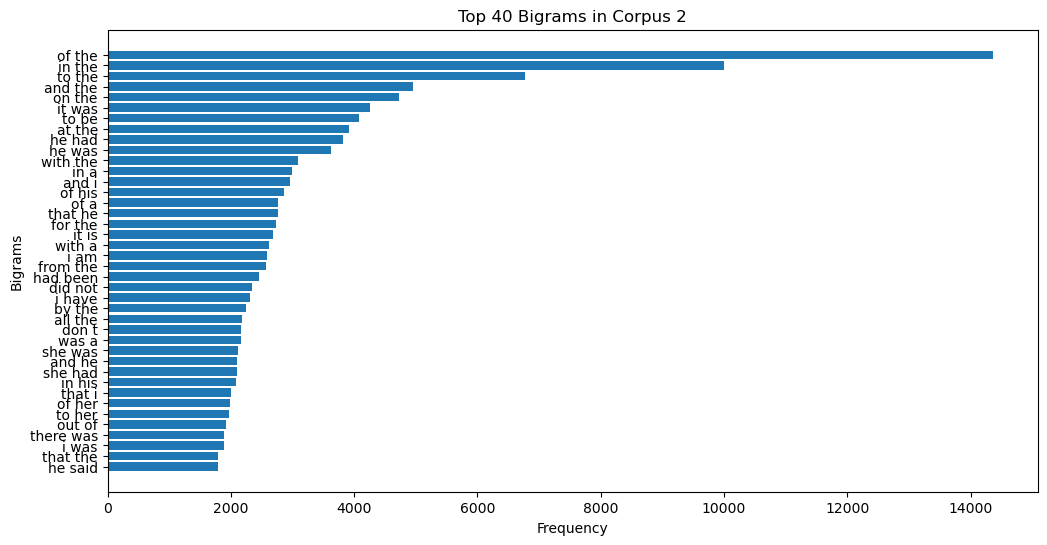

In [22]:
# Extract bigram and frequency for plotting
bigrams, frequencies = zip(*Counter(corpus2_bigrams).most_common(40))
# Create a bar chart to visualize the bigram frequencies
plt.figure(figsize=(12, 6))
plt.barh(range(len(bigrams)), frequencies, tick_label=[" ".join(bigram) for bigram in bigrams])
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 40 Bigrams in Corpus 2")
plt.gca().invert_yaxis()
plt.show()

## Removing Stopwords

In [23]:
# Get the English stopwords list as a set
stopwords_list = set(stopwords.words('english'))

In [24]:
corpus1_stopwords = [word for word in corpus1_word_list if word in stopwords_list] #stopwords in corpus1
corpus2_stopwords = [word for word in corpus2_word_list if word in stopwords_list] #stopwords in corpus2

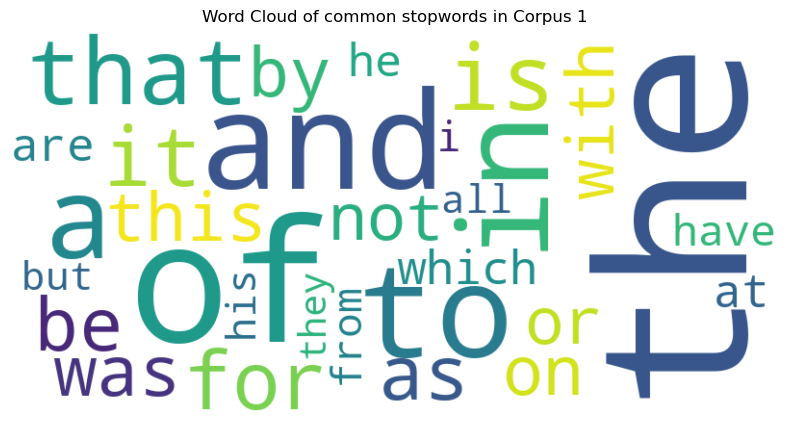

In [25]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus1_stopwords).most_common(30)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of common stopwords in Corpus 1')
plt.show()


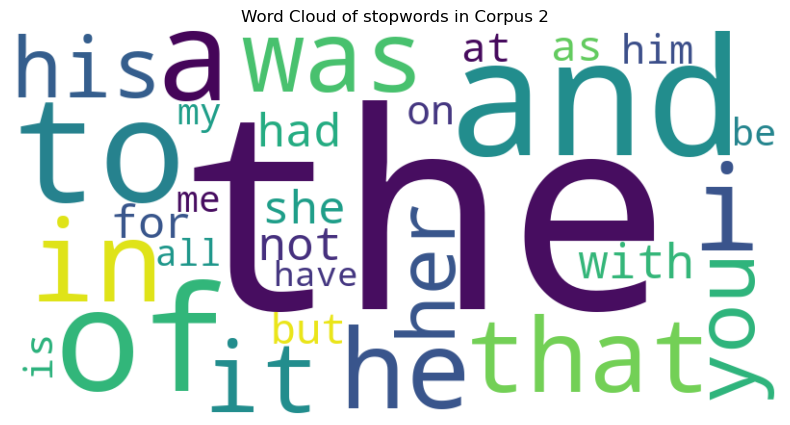

In [26]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus2_stopwords).most_common(30)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of stopwords in Corpus 2')
plt.show()


In [27]:
# Save stopwords and their frequencies to a text file

with open("corpus1_stopwords_list.txt", "w") as output_file:
        
    # Write corpus1_stopwords to the file
    output_file.write("Corpus 1 Stopwords:\n")
    for word in corpus1_stopwords:
        output_file.write(word + "\n")

In [28]:
# Save stopwords and their frequencies to a text file

with open("corpus2_stopwords_list.txt", "w") as output_file:
        
    # Write corpus2_stopwords to the file
    output_file.write("Corpus 2 Stopwords:\n")
    for word in corpus2_stopwords:
        output_file.write(word + "\n")

In [29]:
#Filtered list after removing the stopwords and removing single letter words
corpus1_filtered_list = [word for word in corpus1_word_list if word not in stopwords_list and len(word)>1]

In [30]:
Counter(corpus1_filtered_list).most_common(30)

[('money', 5577),
 ('would', 4171),
 ('one', 3758),
 ('bank', 3745),
 ('new', 3091),
 ('value', 3091),
 ('may', 2956),
 ('mr', 2919),
 ('est', 2884),
 ('gold', 2731),
 ('stock', 2649),
 ('great', 2347),
 ('business', 2326),
 ('time', 2280),
 ('banks', 2244),
 ('exchange', 2203),
 ('states', 2176),
 ('project', 2173),
 ('made', 2056),
 ('upon', 1927),
 ('market', 1904),
 ('country', 1897),
 ('york', 1759),
 ('work', 1756),
 ('per', 1745),
 ('much', 1695),
 ('credit', 1676),
 ('united', 1653),
 ('years', 1610),
 ('must', 1484)]

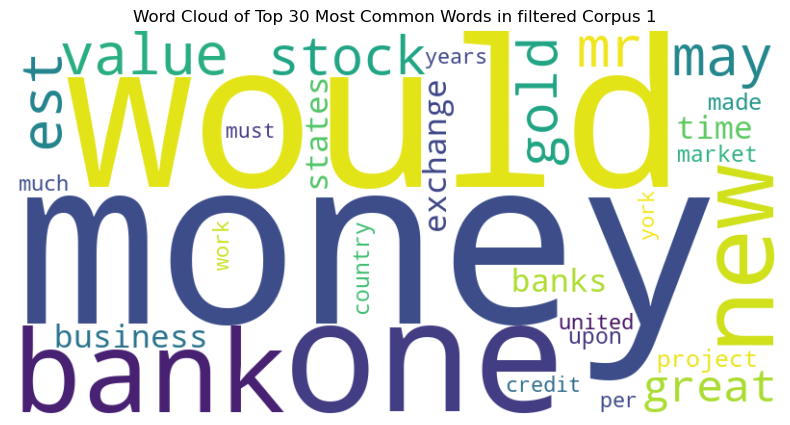

In [31]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus1_filtered_list).most_common(30)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 30 Most Common Words in filtered Corpus 1')
plt.show()


In [32]:
#Filtered bigram list after removing stopwords
corpus1_bigram_filtered_list = [bigram for bigram in corpus1_bigrams if not any(word in stopwords_list for word in bigram)]

In [33]:
Counter(corpus1_bigram_filtered_list).most_common(30)

[(('est', 'est'), 2740),
 (('new', 'york'), 1753),
 (('united', 'states'), 1575),
 (('project', 'gutenberg'), 1445),
 (('per', 'cent'), 1154),
 (('stock', 'exchange'), 834),
 (('wall', 'street'), 764),
 (('project', 'gutenbergtm'), 677),
 (('clearing', 'house'), 395),
 (('electronic', 'works'), 384),
 (('quantity', 'theory'), 346),
 (('mr', 'banker'), 336),
 (('federal', 'reserve'), 326),
 (('gutenberg', 'literary'), 312),
 (('literary', 'archive'), 312),
 (('archive', 'foundation'), 312),
 (('trust', 'company'), 273),
 (('electronic', 'work'), 264),
 (('national', 'bank'), 242),
 (('n', 'n'), 240),
 (('set', 'forth'), 235),
 (('bank', 'notes'), 218),
 (('gutenberg', 'electronic'), 216),
 (('gutenbergtm', 'electronic'), 216),
 (('san', 'francisco'), 209),
 (('legal', 'tender'), 205),
 (('money', 'market'), 195),
 (('paper', 'money'), 194),
 (('national', 'banks'), 184),
 (('gutenberg', 'license'), 168)]

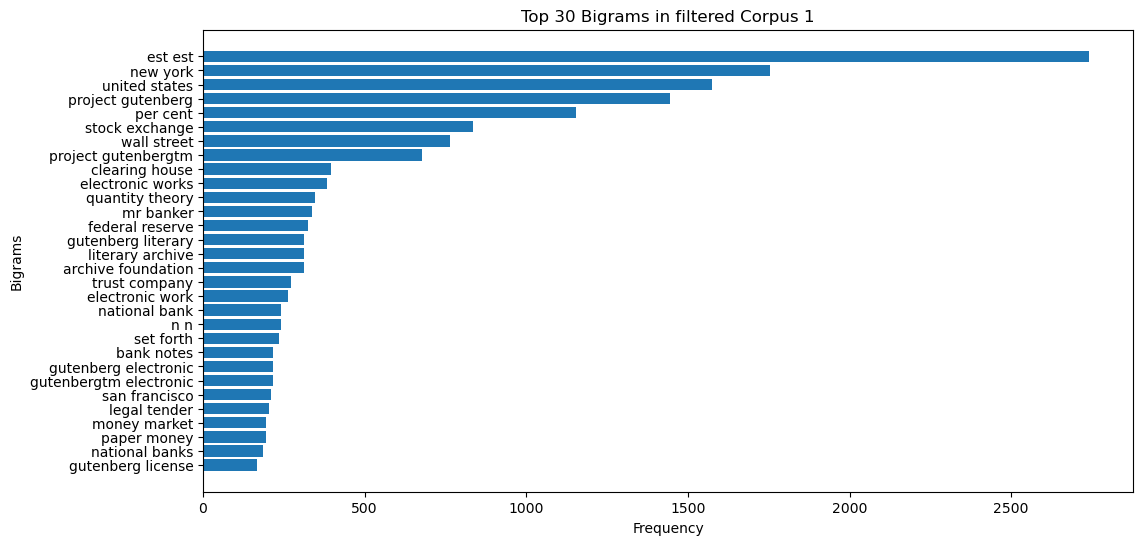

In [34]:
# Extract bigram and frequency for plotting
bigrams, frequencies = zip(*Counter(corpus1_bigram_filtered_list).most_common(30))
# Create a bar chart to visualize the bigram frequencies
plt.figure(figsize=(12, 6))
plt.barh(range(len(bigrams)), frequencies, tick_label=[" ".join(bigram) for bigram in bigrams])
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 30 Bigrams in filtered Corpus 1")
plt.gca().invert_yaxis()
plt.show()

**Corpus2**

In [35]:
#filtered list
corpus2_filtered_list = [word for word in corpus2_word_list if word not in stopwords_list and len(word)>1]

In [36]:
Counter(corpus2_filtered_list).most_common(30)

[('said', 11926),
 ('would', 7463),
 ('one', 7196),
 ('could', 5810),
 ('see', 4330),
 ('know', 4247),
 ('like', 4172),
 ('time', 3899),
 ('little', 3795),
 ('come', 3762),
 ('man', 3697),
 ('well', 3687),
 ('must', 3534),
 ('mr', 3506),
 ('go', 3431),
 ('never', 3143),
 ('went', 3124),
 ('us', 3066),
 ('good', 2889),
 ('came', 2875),
 ('old', 2815),
 ('made', 2813),
 ('say', 2747),
 ('much', 2739),
 ('back', 2590),
 ('thought', 2575),
 ('shall', 2547),
 ('away', 2531),
 ('may', 2522),
 ('think', 2484)]

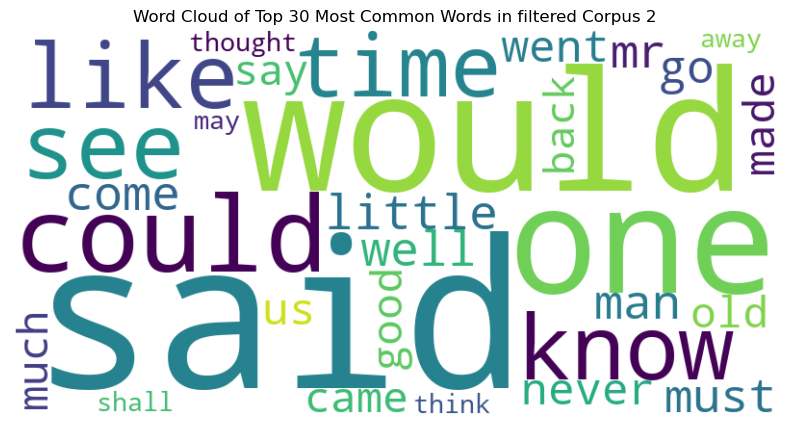

In [37]:
# Get the 30 most common words and their frequencies
common_words = Counter(corpus2_filtered_list).most_common(30)

# Create a dictionary of word frequencies
word_freq = {word: freq for word, freq in common_words}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 30 Most Common Words in filtered Corpus 2')
plt.show()


In [38]:
#filtered bigram
corpus2_bigram_filtered_list = [bigram for bigram in corpus2_bigrams if not any(word in stopwords_list for word in bigram)]

In [39]:
Counter(corpus2_bigram_filtered_list).most_common(30)

[(('project', 'gutenberg'), 1313),
 (('project', 'gutenbergtm'), 784),
 (('alexey', 'alexandrovitch'), 571),
 (('stepan', 'arkadyevitch'), 547),
 (('mr', 'casaubon'), 452),
 (('captain', 'nemo'), 385),
 (('electronic', 'works'), 384),
 (('old', 'man'), 372),
 (('united', 'states'), 359),
 (('van', 'helsing'), 320),
 (('gutenberg', 'literary'), 312),
 (('literary', 'archive'), 312),
 (('archive', 'foundation'), 312),
 (('said', 'mr'), 309),
 (('could', 'see'), 297),
 (('sergey', 'ivanovitch'), 291),
 (('young', 'man'), 278),
 (('mr', 'darcy'), 266),
 (('let', 'us'), 264),
 (('electronic', 'work'), 264),
 (('mr', 'brooke'), 264),
 (('gutenbergtm', 'electronic'), 252),
 (('said', 'mrs'), 251),
 (('nastasia', 'philipovna'), 247),
 (('sir', 'james'), 240),
 (('said', 'dorothea'), 227),
 (('one', 'day'), 224),
 (('next', 'day'), 219),
 (('first', 'time'), 216),
 (('darya', 'alexandrovna'), 205)]

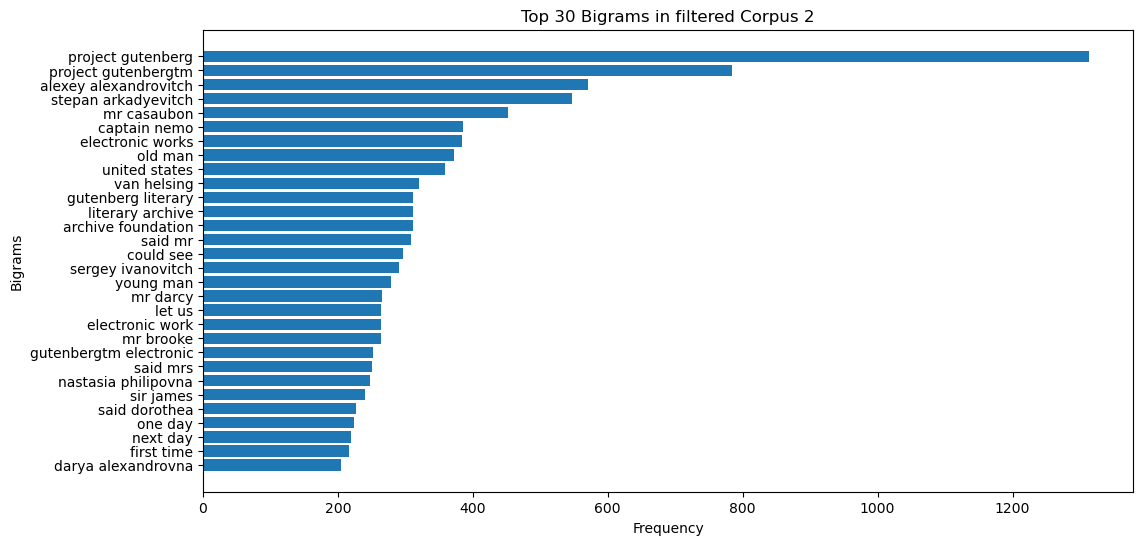

In [40]:
# Extract bigram and frequency for plotting
bigrams, frequencies = zip(*Counter(corpus2_bigram_filtered_list).most_common(30))
# Create a bar chart to visualize the bigram frequencies
plt.figure(figsize=(12, 6))
plt.barh(range(len(bigrams)), frequencies, tick_label=[" ".join(bigram) for bigram in bigrams])
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 30 Bigrams in filtered Corpus 2")
plt.gca().invert_yaxis()
plt.show()